<p> <center> <h1>Search Algorithms: Informed and Uninformed </h1> </center> </p>

<br><br>

<p><h4> <b>Problem 1: Missionaries and Cannibals problem</b> </h4></p>

Three missionaries and three cannibals are on one side of a river, which can be crossed with a boat that can carry one or two people. The problem is to find a way for the six people to cross, in such a way that at no time does the number of cannibals exceed the number of missionaries on either side of the river, if there are missionaries on that side.  

- Formulate the search problem, indicating the state space and the other elements of a problem. And solve the problem by hand using breadth search. 

<br>  

- <u>State space objects </u>:  $$ C C C M M B $$  

Where C represents a cannibal, M represents a missionary and B represents the ship.

- <u> State space representation </u>:  

The state space is represented by the following sets: $$ M, C, B ∈ L $$ $$ M, C, B ∈ R $$
Where L is the left bank of the river and R is the right bank.  

M and C represent the number of missionaries and cannibals on each of their respective shores, so that
$$M = {0,1,2,3}$$
$$C = {0,1,2,3}$$

While B represents the ship such that B = {0,1}. When B=1 is on that edge, when B=0 is on the other.

- <u> State space description: </u>  

Initial state: L = (3 3 1) R = (0 0 0)  
Target state: L = (0 0 0) R = (3 3 1)  

- <u> Possible state space operations: </u>  

CL = carry a cannibal to the left side  
ML = take a missionary to the left side.  
CML = carry a cannibal and a missionary to the left side.  
CCL = bring two cannibals to the left side.  
MML = take two missionaries and two cannibals to the left side.  
CR = carry a cannibal to the right side.  
MR = carry a missionary to the right side.  
CMR = bring a missionary and a cannibal to the right side.  
CCR = bring two cannibals to the right side.  
MMR = bring two missionaries to the right side.  

- <u> BFS solution: </u>  
<div>
<img src="bfs_tree.png" width="600"/>
</div>

<p><h4> <b>Problem 2: Magic Triangle</b> </h4></p>

Classic AI search algorithms are very good at finding solutions to some of the mathematical puzzles involving numbers and geometric figures. Problems such as moving or removing matches to form figures, magic squares, SUDOKU, among others, can be solved by a computer very efficiently and faster than a human being.

Consider the example of the magic triangle of 6 numbers, in which the numbers 1 to 6 must be placed in the six nodes, in such a way that all the sides of the triangle add up to 10. This is 6 nodes equally distributed with 1 node in each corner of the triangle, i.e. 3, and one node at the midpoint between two corners, i.e. the other 3 remaining.

In order to solve the magic triangle problem, we want to use uninformed search algorithms. To do this, it is considered that it starts with an empty triangle, and the six numbers are placed one by one, starting with 1, until all 6 spaces are filled. That is, when selecting the space for number 1, we proceed to select the space for number 2 among the five remaining circles, and so on. If at the end of placing the 6 numbers you have a triangle where its three sides add up to 10, you have a valid solution

- Write a program that solves the magic triangle problem using the following algorithms:
     - breadth-first search,
     - depth-first search.
- Which algorithm solves the problem faster? Why could such an algorithm be an improvement for this problem?

<br>

- <u>BFS and DFS Algorithm</u>:

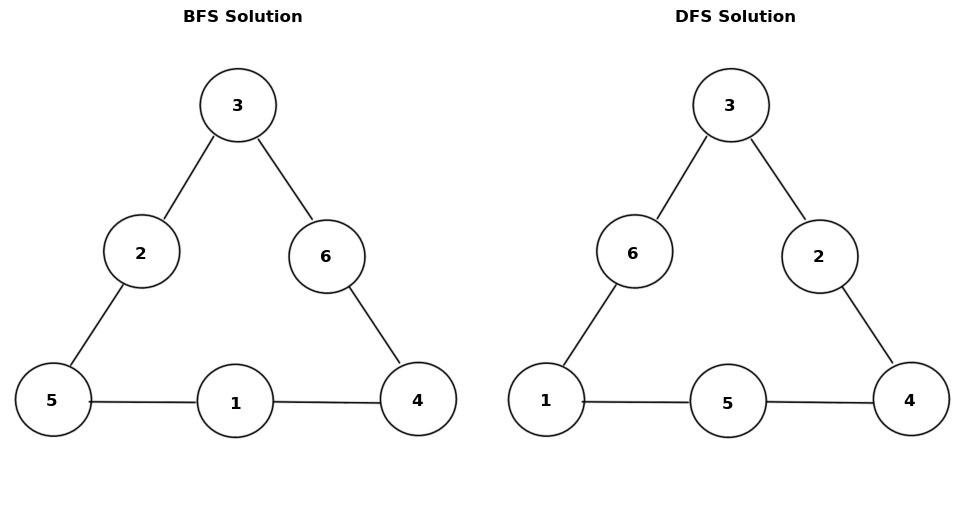

In [1]:
from collections import deque
import matplotlib.pyplot as plt

# Define a class to represent each state in the search space
class Node:
    def __init__(self, position, triangle):
        self.position = position
        self.triangle = triangle

    # Method to generate all possible child nodes
    def expand(self):
        return [Node(self.position + 1, self.triangle + [num])
                for num in range(1, 7) if num not in self.triangle]

    # Method to check if the triangle configuration is valid
    def isValid(self):
        return self.triangle[0] + self.triangle[1] + self.triangle[3] == 10 \
            and self.triangle[1] + self.triangle[2] + self.triangle[4] == 10 \
            and self.triangle[3] + self.triangle[4] + self.triangle[5] == 10

# Breadth-First Search algorithm
def bfs():
    queue = deque([Node(0, [])]) # Initialize queue with starting node
    
    while queue:
        node = queue.popleft() # Pop the leftmost node from the queue
        if len(node.triangle) == 6:
            if node.isValid():
                return node.triangle
        else:
            queue.extend(node.expand()) # Add all child nodes to the queue

# Depth-First Search algorithm
def dfs():
    stack = deque([Node(0, [])])
    
    while stack:
        node = stack.pop() # Pop the top node from the stack
        if len(node.triangle) == 6:
            if node.isValid():
                return node.triangle
        else:
            stack.extend(node.expand()) # Add all child nodes to the queue

# Function to draw the magic triangle
def drawTriangles(triangle1, triangle2):
    # Create a single figure with two subplots
    axs = plt.subplots(1, 2, figsize=(10, 5))[1]
    
    for triangle, ax, title in zip([triangle1, triangle2], axs, ['BFS Solution', 'DFS Solution']):
        # Set up the axis
        ax.set_title(title, fontweight='bold')
        ax.set_aspect('equal')
        ax.set_xlim(0, 400)
        ax.set_ylim(0, 400)
        ax.axis('off')
        
        # Load and display the background image
        background = plt.imread("magic_triangle.png")
        ax.imshow(background, extent=[0, 400, 0, 400])
        
        # Define node positions
        circle_positions = [[112, 208], [195, 335], [271, 205], [36, 81], [193, 79], [349, 81]]

        # Add values to the nodes
        for i, (x, y) in enumerate(circle_positions):
            ax.text(x, y, str(triangle[i]), fontsize=12, fontweight='bold', ha='center', va='center', color='black')
            
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Main function to solve and visualize the magic triangle
def main():
    # Find solution using BFS
    bfs_solution = bfs()
    
    # Find solution using DFS
    dfs_solution = dfs()

    # Draw the triangles for BFS and DFS solutions
    drawTriangles(bfs_solution, dfs_solution)

if __name__ == "__main__":
    main()

To determine which algorithm solves the problem faster, we first consider the behavior of the BFS and DFS algorithms in terms of their search strategy.

In the case of the BFS algorithm, a queue-type data structure is used, where the nodes are explored in order of arrival, following a FIFO (First In, First Out) principle. This means that BFS expands nodes in layers, exploring all of a node's neighbors before moving on to the next level's neighbors. Since BFS prioritizes exploring shallower nodes before going deeper, it tends to find optimal solutions in a small search space, such as in the magic triangle problem.

On the other hand, the DFS algorithm uses a stack-type data structure, where the nodes are explored in the reverse order to which they were added, following a LIFO (Last In, First Out) principle. DFS tends to explore deeply along a path until reaching a goal state or termination condition. This can be advantageous in problems with extremely large search spaces or in problems where it is not necessary to find the optimal solution, but simply a valid solution.

Since the magic triangle problem does not have an excessively large search space and the objective is to find a solution quickly and efficiently, we conclude that the BFS algorithm is the most efficient. However, to confirm this assumption, we perform a computational test where we measure the execution time of each function to determine which is faster in practice. Which allowed us to validate our analysis.

<p><h4> <b>Problem 3: Three Jars Problem</b> </h4></p>

In the three jars problem, a situation arises in which there are three jars or containers of capacities A, B and C liters (integers) with A > B > C and A even. Initially, the largest jar is full and the other two are empty. The objective is to distribute the initial content equally between the two largest jugs, A and B, correctly transferring as much water as possible from one jug to the target jug. This makes impossible to arbitrarily decide how many liters to transfer between the jars.

For example, for the problem with capcities A = 8, B = 5, and C = 3, there are initially 8 liters in jar A, and the rest of the jars are empty. Then, in the end, jars A and B would be left with 4 liters and jar C would be empty.

- Use an informed search algorithm to resolve the problem. Describe the heuristic function employed.
- Also, solve it using an uninformed search algorithm, indicating the sequence of transitions necessary to get from the initial state to the final state.

<br>

- <u>Informed Search using A*</u>:

A heuristic function that could be useful is the difference between the amount of water in jars A and B, considering that the objective is to distribute the water equally between them. The goal is to minimize the difference between the amounts of water in jars A and B, since this difference represents the distance to the target state. The smaller the difference between A and B, the closer the state is to the goal. Therefore, a heuristic function could be:
$$h(n) = |A(n) - B(n)|$$
Where:  
- $A(n)$ is the amount of water in jar A in state $n$.  
- $B(n)$ is the amount of water in jar B in state $n$.  

Below is the implementation of the algorithm:

In [2]:
import heapq

# Define a class to represent a state in the three jars problem
class State:
    def __init__(self, A, B, C, parent=None, action=None):
        self.A = A
        self.B = B
        self.C = C
        self.parent = parent
        self.action = action
        self.cost = 0

    # Calculate the estimated cost of reaching the target state from this state using a heuristic
    def heuristicCost(self):
        # Use the difference between the amount of water in jars A and B as a heuristic
        return abs(self.A - self.B)

    # Define state comparison based on estimated cost plus actual cost
    def __lt__(self, other):
        return self.cost + self.heuristicCost() < other.cost + other.heuristicCost()

    # Function to get the successors of a given state
    def getSuccessors(self, A_capacity, B_capacity, C_capacity):
        successors = []

        # Define the possible actions
        actions = [
            ("Pour A to B", (self.A - min(self.A, B_capacity - self.B), self.B + min(self.A, B_capacity - self.B), self.C)),
            ("Pour B to A", (self.A + min(self.B, A_capacity - self.A), self.B - min(self.B, A_capacity - self.A), self.C)),
            ("Pour A to C", (self.A - min(self.A, C_capacity - self.C), self.B, self.C + min(self.A, C_capacity - self.C))),
            ("Pour C to A", (self.A + min(self.C, A_capacity - self.A), self.B, self.C - min(self.C, A_capacity - self.A))),
            ("Pour B to C", (self.A, self.B - min(self.B, C_capacity - self.C), self.C + min(self.B, C_capacity - self.C))),
            ("Pour C to B", (self.A, self.B + min(self.C, B_capacity - self.B), self.C - min(self.C, B_capacity - self.B)))
        ]

        # Iterate over all possible actions
        for action_name, (new_A, new_B, new_C) in actions:
            # Check if the action is valid (new state is different from current state)
            if (new_A, new_B, new_C) != (self.A, self.B, self.C):
                successors.append(State(new_A, new_B, new_C, self, action_name))
    
        return successors

# Function to recover the solution path from the target state to the initial state
def getSolutionPath(state):
    path = []
    while state:
        path.append(state)
        state = state.parent
    return reversed(path)

def threeJarsProblem(A_capacity = 8, B_capacity = 5, C_capacity = 3):
    # Define initial state and target state
    initial_state = State(A_capacity, 0, 0)
    goal_state = State(A_capacity // 2, A_capacity // 2, 0) if (A_capacity // 2) <= B_capacity else State(min(A_capacity, B_capacity), min(A_capacity, B_capacity), 0)

    # Initialize the A* search algorithm
    open_list = []
    closed_set = set()

    # Add the initial state to the open list
    heapq.heappush(open_list, initial_state)

    # Perform A* search until you find the target state
    solution = False
    while open_list:
        current_state = heapq.heappop(open_list)

        # Check if the goal state has been reached
        if current_state.A == goal_state.A and current_state.B == goal_state.B:
            solution, solution_path = True, getSolutionPath(current_state)
            
            # Print the solution path
            print("Solution found:")
            for i, state in enumerate(solution_path):
                print(f"Step {i}: {state.action} -> ({state.A}, {state.B}, {state.C})")
            break

        # Mark current state as visited
        closed_set.add((current_state.A, current_state.B, current_state.C))

        # Get the successors of the current state
        successors = current_state.getSuccessors(A_capacity, B_capacity, C_capacity)
        
        # Add successors to the open list if they have not been visited
        for successor in successors:
            if (successor.A, successor.B, successor.C) not in closed_set:
                successor.cost = current_state.cost + 1
                heapq.heappush(open_list, successor)
    
    # Error message when no solution is reached
    if not solution:
        print("No solution was found")
        
def main():
    # Define jar capacities
    A_capacity = 8
    B_capacity = 3
    C_capacity = 2
    
    # Find the solution to the Three Jars Problem
    threeJarsProblem(A_capacity, B_capacity, C_capacity)
        

if __name__ == "__main__":
    main()

Solution found:
Step 0: None -> (8, 0, 0)
Step 1: Pour A to B -> (5, 3, 0)
Step 2: Pour A to C -> (3, 3, 2)


- <u>Uninformed Search using BFS</u>:

In [3]:
from collections import deque

# Define a class to represent a state in the three jugs problem
class State:
    def __init__(self, A, B, C, parent=None, action=None):
        self.A = A
        self.B = B
        self.C = C
        self.parent = parent
        self.action = action

    # Function to get the successors of a given state
    def getSuccessors(self, A_capacity, B_capacity, C_capacity):
        successors = []
        
        # Define the possible actions
        actions = [
            ("Pour A to B", (self.A - min(self.A, B_capacity - self.B), self.B + min(self.A, B_capacity - self.B), self.C)),
            ("Pour B to A", (self.A + min(self.B, A_capacity - self.A), self.B - min(self.B, A_capacity - self.A), self.C)),
            ("Pour A to C", (self.A - min(self.A, C_capacity - self.C), self.B, self.C + min(self.A, C_capacity - self.C))),
            ("Pour C to A", (self.A + min(self.C, A_capacity - self.A), self.B, self.C - min(self.C, A_capacity - self.A))),
            ("Pour B to C", (self.A, self.B - min(self.B, C_capacity - self.C), self.C + min(self.B, C_capacity - self.C))),
            ("Pour C to B", (self.A, self.B + min(self.C, B_capacity - self.B), self.C - min(self.C, B_capacity - self.B)))
        ]

        # Iterate over all possible actions
        for action_name, (new_A, new_B, new_C) in actions:
            # Check if the action is valid (new state is different from current state)
            if (new_A, new_B, new_C) != (self.A, self.B, self.C):
                successors.append(State(new_A, new_B, new_C, self, action_name))

        return successors

# Function to recover the solution path from the target state to the initial state
def getSolutionPath(state):
    path = []
    while state:
        path.append(state)
        state = state.parent
    return reversed(path)

# Breadth-First Search algorithm
def bfs(initial_state, A_capacity, B_capacity, C_capacity):
    queue = deque([initial_state])  # Initialize queue with starting node

    # Set to keep track of visited states
    visited = set()

    while queue:
        current_state = queue.popleft()  # Pop the leftmost node from the queue

        # Check if the current state is the goal state
        if current_state.A == current_state.B:
            return getSolutionPath(current_state)

        # Mark the current state as visited
        visited.add((current_state.A, current_state.B, current_state.C))

        # Get the successors of the current state
        successors = current_state.getSuccessors(A_capacity, B_capacity, C_capacity)

        # Add successors to the queue if they have not been visited
        for successor in successors:
            if (successor.A, successor.B, successor.C) not in visited:
                queue.append(successor)

    # If the goal state is not found
    return None

def main():
    # Define jar capacities
    A_capacity = 8
    B_capacity = 5
    C_capacity = 3

    # Define initial state
    initial_state = State(A_capacity, 0, 0)

    # Perform Breadth-First Search
    solution_path = bfs(initial_state, A_capacity, B_capacity, C_capacity)

    # Print the solution path
    if solution_path:
        print("Solution found:")
        for i, state in enumerate(solution_path):
            print(f"Step {i}: {state.action} -> ({state.A}, {state.B}, {state.C})")
    else:
        print("No solution found.")

if __name__ == "__main__":
    main()


Solution found:
Step 0: None -> (8, 0, 0)
Step 1: Pour A to B -> (3, 5, 0)
Step 2: Pour B to C -> (3, 2, 3)
Step 3: Pour C to A -> (6, 2, 0)
Step 4: Pour B to C -> (6, 0, 2)
Step 5: Pour A to B -> (1, 5, 2)
Step 6: Pour B to C -> (1, 4, 3)
Step 7: Pour C to A -> (4, 4, 0)


<p><h4> <b>Problem 4: Sliding Puzzle</b> </h4></p>

1. Use the A* algorithm to solve the 8-number (3x3) sliding puzzle. Use as a heuristic function the sum of the distances between the position of each number and its corresponding target position. Run your algorithm with different initial states.
2. Change the heuristic function for the number of elements that are in the wrong position. Which heuristic function do you consider to be the most appropriate?
3. Use an uninformed search algorithm to solve the 3x3 puzzle. Was the algorithm able to solve the problem in a reasonable time? Which algorithm do you consider to be more efficient, informed search or uninformed search?
4. Use the A* algorithm with the heuristic function of your choice to solve the 15-number (4x4) sliding puzzle. Is the selected algorithm capable of finding a solution in these cases?

<br>

- <u>3x3 Sliding Puzzle using A* and Manhattan Distance Heuristic</u>:

In [4]:
import heapq
import random

# Define a class to represent a state in the 8-puzzle problem
class PuzzleState:
    def __init__(self, puzzle, parent=None, action=None):
        self.puzzle = puzzle
        self.parent = parent
        self.action = action
        self.cost = 0

    # Calculate the estimated cost of reaching the target state from this state using a heuristic
    def heuristicCost(self):
        # Initialize the total Manhattan distance
        total_manhattan_distance = 0

        # Iterate over the puzzle board
        for i in range(3):
            for j in range(3):
                # Get the value of the current tile
                value = self.puzzle[i][j]

                # Find the coordinates of the tile in the goal state
                x_goal, y_goal = divmod(value - 1, 3)

                # Calculate the Manhattan distance
                manhattan_distance = abs(i - x_goal) + abs(j - y_goal)

                # Add the Manhattan distance to the total
                total_manhattan_distance += manhattan_distance

        return total_manhattan_distance

    # Define state comparison based on estimated cost plus actual cost
    def __lt__(self, other):
        return self.cost + self.heuristicCost() < other.cost + other.heuristicCost()

    # Function to get the successors of a given state
    def getSuccessors(self):
        successors = []

        # Find the position of the empty tile
        for i in range(3):
            for j in range(3):
                if self.puzzle[i][j] == 0:
                    x, y = i, j
                    break

        # Define the possible actions
        actions = [
            ("Move Up", (x - 1, y)),
            ("Move Down", (x + 1, y)),
            ("Move Left", (x, y - 1)),
            ("Move Right", (x, y + 1))
        ]

        # Iterate over all possible actions
        for action_name, (new_x, new_y) in actions:
            # Check if the action is valid (new position is within the puzzle board)
            if 0 <= new_x < 3 and 0 <= new_y < 3:
                # Create a new puzzle state by swapping the empty tile with the adjacent tile
                new_puzzle = [row[:] for row in self.puzzle]
                new_puzzle[x][y], new_puzzle[new_x][new_y] = new_puzzle[new_x][new_y], new_puzzle[x][y]

                # Add the new state to the list of successors
                successors.append(PuzzleState(new_puzzle, self, action_name))

        return successors

# Function to recover the solution path from the target state to the initial state
def getSolutionPath(state):
    path = []
    while state:
        path.append(state)
        state = state.parent
    return reversed(path)

def solve8Puzzle(initial_puzzle, goal_puzzle):
    # Define initial state and target state
    initial_state = PuzzleState(initial_puzzle)
    goal_state = PuzzleState(goal_puzzle)

    # Initialize the A* search algorithm
    open_list = []
    closed_set = set()

    # Add the initial state to the open list
    heapq.heappush(open_list, initial_state)

    # Perform A* search until you find the goal state
    solution = False
    while open_list:
        current_state = heapq.heappop(open_list)

        # Check if the goal state has been reached
        if current_state.puzzle == goal_state.puzzle:
            solution, solution_path = True, getSolutionPath(current_state)

            # Print the solution path
            print("Solution found:\n")
            for i, state in enumerate(solution_path):
                print(f"Step {i}: {state.action}")
                for row in state.puzzle:
                    # Replace 0 with an empty space
                    print(" ".join([" " if num == 0 else str(num) for num in row]))       
                print()
            break

        # Mark current state as visited
        closed_set.add(tuple(map(tuple, current_state.puzzle)))

        # Get the successors of the current state
        successors = current_state.getSuccessors()

        # Add successors to the open list if they have not been visited
        for successor in successors:
            if tuple(map(tuple, successor.puzzle)) not in closed_set:
                successor.cost = current_state.cost + 1
                heapq.heappush(open_list, successor)

    # Error message when no solution is reached
    if not solution:
        print("No solution was found for \n")
        for row in initial_puzzle:
            # Replace 0 with an empty space
            print(" ".join([" " if num == 0 else str(num) for num in row]))


def main():
    # Define initial and goal puzzles
    numbers = list(range(9)) # Generate a list of numbers from 0 to 8
    random.shuffle(numbers) # Shuffle the list
    initial_puzzle = [numbers[i:i+3] for i in range(0, 9, 3)] # Reshape the shuffled list into a 3x3 grid         
    goal_puzzle = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]

    # Solve the 8-puzzle problem
    solve8Puzzle(initial_puzzle, goal_puzzle)

if __name__ == "__main__":
    main()

Solution found:

Step 0: None
6 3  
1 4 5
2 8 7

Step 1: Move Left
6   3
1 4 5
2 8 7

Step 2: Move Left
  6 3
1 4 5
2 8 7

Step 3: Move Down
1 6 3
  4 5
2 8 7

Step 4: Move Right
1 6 3
4   5
2 8 7

Step 5: Move Down
1 6 3
4 8 5
2   7

Step 6: Move Right
1 6 3
4 8 5
2 7  

Step 7: Move Up
1 6 3
4 8  
2 7 5

Step 8: Move Left
1 6 3
4   8
2 7 5

Step 9: Move Up
1   3
4 6 8
2 7 5

Step 10: Move Left
  1 3
4 6 8
2 7 5

Step 11: Move Down
4 1 3
  6 8
2 7 5

Step 12: Move Down
4 1 3
2 6 8
  7 5

Step 13: Move Right
4 1 3
2 6 8
7   5

Step 14: Move Right
4 1 3
2 6 8
7 5  

Step 15: Move Up
4 1 3
2 6  
7 5 8

Step 16: Move Left
4 1 3
2   6
7 5 8

Step 17: Move Left
4 1 3
  2 6
7 5 8

Step 18: Move Up
  1 3
4 2 6
7 5 8

Step 19: Move Right
1   3
4 2 6
7 5 8

Step 20: Move Down
1 2 3
4   6
7 5 8

Step 21: Move Down
1 2 3
4 5 6
7   8

Step 22: Move Right
1 2 3
4 5 6
7 8  



- <u>3x3 Sliding Puzzle using A* and Misplaced Tiles Heuristic</u>:

In [8]:
import heapq
import random

# Define a class to represent a state in the 8-puzzle problem
class PuzzleState:
    def __init__(self, puzzle, parent=None, action=None):
        self.puzzle = puzzle
        self.parent = parent
        self.action = action
        self.cost = 0

    # Calculate the estimated cost of reaching the target state from this state using a heuristic
    def heuristicCost(self):
        # Initialize the total number of misplaced tiles
        misplaced_tiles = 0

        # Iterate over the puzzle board
        for i in range(3):
            for j in range(3):
                # Get the value of the current tile
                value = self.puzzle[i][j]

                # Find the coordinates of the tile in the goal state
                x_goal, y_goal = divmod(value - 1, 3)

                # Check if the tile is in the correct position
                if (i, j) != (x_goal, y_goal):
                    misplaced_tiles += 1

        return misplaced_tiles

    # Define state comparison based on estimated cost plus actual cost
    def __lt__(self, other):
        return self.cost + self.heuristicCost() < other.cost + other.heuristicCost()

    # Function to get the successors of a given state
    def getSuccessors(self):
        successors = []

        # Find the position of the empty tile
        for i in range(3):
            for j in range(3):
                if self.puzzle[i][j] == 0:
                    x, y = i, j
                    break

        # Define the possible actions
        actions = [
            ("Move Up", (x - 1, y)),
            ("Move Down", (x + 1, y)),
            ("Move Left", (x, y - 1)),
            ("Move Right", (x, y + 1))
        ]

        # Iterate over all possible actions
        for action_name, (new_x, new_y) in actions:
            # Check if the action is valid (new position is within the puzzle board)
            if 0 <= new_x < 3 and 0 <= new_y < 3:
                # Create a new puzzle state by swapping the empty tile with the adjacent tile
                new_puzzle = [row[:] for row in self.puzzle]
                new_puzzle[x][y], new_puzzle[new_x][new_y] = new_puzzle[new_x][new_y], new_puzzle[x][y]

                # Add the new state to the list of successors
                successors.append(PuzzleState(new_puzzle, self, action_name))

        return successors

# Function to recover the solution path from the target state to the initial state
def getSolutionPath(state):
    path = []
    while state:
        path.append(state)
        state = state.parent
    return reversed(path)

def solve8Puzzle(initial_puzzle, goal_puzzle):
    # Define initial state and target state
    initial_state = PuzzleState(initial_puzzle)
    goal_state = PuzzleState(goal_puzzle)

    # Initialize the A* search algorithm
    open_list = []
    closed_set = set()

    # Add the initial state to the open list
    heapq.heappush(open_list, initial_state)

    # Perform A* search until you find the goal state
    solution = False
    while open_list:
        current_state = heapq.heappop(open_list)

        # Check if the goal state has been reached
        if current_state.puzzle == goal_state.puzzle:
            solution, solution_path = True, getSolutionPath(current_state)

            # Print the solution path
            print("Solution found:\n")
            for i, state in enumerate(solution_path):
                print(f"Step {i}: {state.action}")
                for row in state.puzzle:
                    # Replace 0 with an empty space
                    print(" ".join([" " if num == 0 else str(num) for num in row]))       
                print()
            break

        # Mark current state as visited
        closed_set.add(tuple(map(tuple, current_state.puzzle)))

        # Get the successors of the current state
        successors = current_state.getSuccessors()

        # Add successors to the open list if they have not been visited
        for successor in successors:
            if tuple(map(tuple, successor.puzzle)) not in closed_set:
                successor.cost = current_state.cost + 1
                heapq.heappush(open_list, successor)

    # Error message when no solution is reached
    if not solution:
        print("No solution was found for \n")
        for row in initial_puzzle:
            # Replace 0 with an empty space
            print(" ".join([" " if num == 0 else str(num) for num in row]))    
        


def main():
    # Define initial and goal puzzles
    numbers = list(range(9)) # Generate a list of numbers from 0 to 8
    random.shuffle(numbers) # Shuffle the list
    initial_puzzle = [numbers[i:i+3] for i in range(0, 9, 3)] # Reshape the shuffled list into a 3x3 grid         
    goal_puzzle = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]

    # Solve the 8-puzzle problem
    solve8Puzzle(initial_puzzle, goal_puzzle)

if __name__ == "__main__":
    main()

Solution found:

Step 0: None
  5 4
8 2 7
1 3 6

Step 1: Move Right
5   4
8 2 7
1 3 6

Step 2: Move Down
5 2 4
8   7
1 3 6

Step 3: Move Down
5 2 4
8 3 7
1   6

Step 4: Move Left
5 2 4
8 3 7
  1 6

Step 5: Move Up
5 2 4
  3 7
8 1 6

Step 6: Move Up
  2 4
5 3 7
8 1 6

Step 7: Move Right
2   4
5 3 7
8 1 6

Step 8: Move Down
2 3 4
5   7
8 1 6

Step 9: Move Down
2 3 4
5 1 7
8   6

Step 10: Move Left
2 3 4
5 1 7
  8 6

Step 11: Move Up
2 3 4
  1 7
5 8 6

Step 12: Move Right
2 3 4
1   7
5 8 6

Step 13: Move Right
2 3 4
1 7  
5 8 6

Step 14: Move Up
2 3  
1 7 4
5 8 6

Step 15: Move Left
2   3
1 7 4
5 8 6

Step 16: Move Left
  2 3
1 7 4
5 8 6

Step 17: Move Down
1 2 3
  7 4
5 8 6

Step 18: Move Right
1 2 3
7   4
5 8 6

Step 19: Move Right
1 2 3
7 4  
5 8 6

Step 20: Move Down
1 2 3
7 4 6
5 8  

Step 21: Move Left
1 2 3
7 4 6
5   8

Step 22: Move Left
1 2 3
7 4 6
  5 8

Step 23: Move Up
1 2 3
  4 6
7 5 8

Step 24: Move Right
1 2 3
4   6
7 5 8

Step 25: Move Down
1 2 3
4 5 6
7   8

Step 26: Move

The Manhattan distance heuristic, that is, the first; tends to be more accurate and effective in most cases for this particular problem, as it considers the relative location of each piece on the board. However, the misplaced tiles heuristic can be a good option if you want to prioritize computational efficiency or if the Manhattan heuristic is not available due to performance constraints.

<br>

- <u>3x3 Sliding Puzzle using BFS</u>:

In [10]:
from collections import deque
import random

# Define a class to represent a state in the 8-puzzle problem
class PuzzleState:
    def __init__(self, puzzle, parent=None, action=None):
        self.puzzle = puzzle
        self.parent = parent
        self.action = action

    # Function to get the successors of a given state
    def getSuccessors(self):
        successors = []

        # Find the position of the empty tile
        for i in range(3):
            for j in range(3):
                if self.puzzle[i][j] == 0:
                    x, y = i, j
                    break

        # Define the possible actions
        actions = [
            ("Move Up", (x - 1, y)),
            ("Move Down", (x + 1, y)),
            ("Move Left", (x, y - 1)),
            ("Move Right", (x, y + 1))
        ]

        # Iterate over all possible actions
        for action_name, (new_x, new_y) in actions:
            # Check if the action is valid (new position is within the puzzle board)
            if 0 <= new_x < 3 and 0 <= new_y < 3:
                # Create a new puzzle state by swapping the empty tile with the adjacent tile
                new_puzzle = [row[:] for row in self.puzzle]
                new_puzzle[x][y], new_puzzle[new_x][new_y] = new_puzzle[new_x][new_y], new_puzzle[x][y]

                # Add the new state to the list of successors
                successors.append(PuzzleState(new_puzzle, self, action_name))

        return successors

# Function to recover the solution path from the target state to the initial state
def getSolutionPath(state):
    path = []
    while state:
        path.append(state)
        state = state.parent
    return reversed(path)

# Breadth-First Search algorithm
def bfs(initial_puzzle, goal_puzzle):
    # Initialize the frontier with the initial state
    frontier = deque([PuzzleState(initial_puzzle)])

    # Initialize the explored set
    explored = set()

    # Perform BFS
    while frontier:
        current_state = frontier.popleft()

        # Check if the current state is the goal state
        if current_state.puzzle == goal_puzzle:
            # Recover the solution path
            solution_path = getSolutionPath(current_state)

            # Print the solution path
            print("Solution found:")
            for i, state in enumerate(solution_path):
                print(f"Step {i}: {state.action}")
                for row in state.puzzle:
                    # Replace 0 with an empty space
                    print(" ".join([" " if num == 0 else str(num) for num in row]))
                print()
            return

        # Add the current state to the explored set
        explored.add(tuple(map(tuple, current_state.puzzle)))

        # Get the successors of the current state
        successors = current_state.getSuccessors()

        # Add unexplored successors to the frontier
        for successor in successors:
            if tuple(map(tuple, successor.puzzle)) not in explored:
                frontier.append(successor)

    # Error message when no solution is reached
    print("No solution was found for \n")
    for row in initial_puzzle:
        # Replace 0 with an empty space
        print(" ".join([" " if num == 0 else str(num) for num in row]))

def main():
    # Define initial and goal puzzles
    numbers = list(range(9)) # Generate a list of numbers from 0 to 8
    random.shuffle(numbers) # Shuffle the list
    initial_puzzle = [numbers[i:i+3] for i in range(0, 9, 3)] # Reshape the shuffled list into a 3x3 grid
    goal_puzzle = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]

    # Solve the 8-puzzle problem using Breadth-First Search
    bfs(initial_puzzle, goal_puzzle)

if __name__ == "__main__":
    main()

Solution found:
Step 0: None
5 6 8
4   2
1 7 3

Step 1: Move Right
5 6 8
4 2  
1 7 3

Step 2: Move Up
5 6  
4 2 8
1 7 3

Step 3: Move Left
5   6
4 2 8
1 7 3

Step 4: Move Down
5 2 6
4   8
1 7 3

Step 5: Move Left
5 2 6
  4 8
1 7 3

Step 6: Move Down
5 2 6
1 4 8
  7 3

Step 7: Move Right
5 2 6
1 4 8
7   3

Step 8: Move Right
5 2 6
1 4 8
7 3  

Step 9: Move Up
5 2 6
1 4  
7 3 8

Step 10: Move Up
5 2  
1 4 6
7 3 8

Step 11: Move Left
5   2
1 4 6
7 3 8

Step 12: Move Left
  5 2
1 4 6
7 3 8

Step 13: Move Down
1 5 2
  4 6
7 3 8

Step 14: Move Right
1 5 2
4   6
7 3 8

Step 15: Move Down
1 5 2
4 3 6
7   8

Step 16: Move Right
1 5 2
4 3 6
7 8  

Step 17: Move Up
1 5 2
4 3  
7 8 6

Step 18: Move Left
1 5 2
4   3
7 8 6

Step 19: Move Up
1   2
4 5 3
7 8 6

Step 20: Move Right
1 2  
4 5 3
7 8 6

Step 21: Move Down
1 2 3
4 5  
7 8 6

Step 22: Move Down
1 2 3
4 5 6
7 8  



The time it takes for the algorithm to solve the problem depends on the size of the search space and the efficiency of the selected algorithm. For the 8-puzzle puzzle, both the informed search and uninformed search algorithms can solve the problem in a reasonable time, since the search space is not excessively large.

In terms of efficiency, the informed search algorithm, such as A* with a good heuristic, was generally more efficient than the uninformed search algorithm, such as Breadth-First Search (BFS), since BFS expands all nodes by one level. before moving to the next level, which can lead to an exponential explosion of nodes (and memory) as the depth of the search tree increases; while the A* algorithm can avoid the expansion of unpromising nodes by using a heuristic function that estimates the cost of the path from the current node to the target node.

Lower total number of expanded nodes = higher efficiency.

<br>

- <u>4x4 Sliding Puzzle using A* and Manhattan Distance Heuristic</u>:

In [ ]:
import heapq
import random

# Define a class to represent a state in the 15-puzzle problem
class PuzzleState:
    def __init__(self, puzzle, parent=None, action=None):
        self.puzzle = puzzle
        self.parent = parent
        self.action = action
        self.cost = 0

    # Calculate the estimated cost of reaching the target state from this state using a heuristic
    def heuristicCost(self):
        # Initialize the total Manhattan distance
        total_manhattan_distance = 0

        # Iterate over the puzzle board
        for i in range(4):
            for j in range(4):
                # Get the value of the current tile
                value = self.puzzle[i][j]

                if value != 0:
                    # Find the coordinates of the tile in the goal state
                    x_goal, y_goal = divmod(value - 1, 4)

                    # Calculate the Manhattan distance
                    manhattan_distance = abs(i - x_goal) + abs(j - y_goal)

                    # Add the Manhattan distance to the total
                    total_manhattan_distance += manhattan_distance

        return total_manhattan_distance

    # Define state comparison based on estimated cost plus actual cost
    def __lt__(self, other):
        return self.cost + self.heuristicCost() < other.cost + other.heuristicCost()

    # Function to get the successors of a given state
    def getSuccessors(self):
        successors = []

        # Find the position of the empty tile
        for i in range(4):
            for j in range(4):
                if self.puzzle[i][j] == 0:
                    x, y = i, j
                    break

        # Define the possible actions
        actions = [
            ("Move Up", (x - 1, y)),
            ("Move Down", (x + 1, y)),
            ("Move Left", (x, y - 1)),
            ("Move Right", (x, y + 1))
        ]

        # Iterate over all possible actions
        for action_name, (new_x, new_y) in actions:
            # Check if the action is valid (new position is within the puzzle board)
            if 0 <= new_x < 4 and 0 <= new_y < 4:
                # Create a new puzzle state by swapping the empty tile with the adjacent tile
                new_puzzle = [row[:] for row in self.puzzle]
                new_puzzle[x][y], new_puzzle[new_x][new_y] = new_puzzle[new_x][new_y], new_puzzle[x][y]

                # Add the new state to the list of successors
                successors.append(PuzzleState(new_puzzle, self, action_name))

        return successors

# Function to recover the solution path from the target state to the initial state
def getSolutionPath(state):
    path = []
    while state:
        path.append(state)
        state = state.parent
    return reversed(path)

def solve15Puzzle(initial_puzzle, goal_puzzle):
    # Define initial state and target state
    initial_state = PuzzleState(initial_puzzle)
    goal_state = PuzzleState(goal_puzzle)

    # Initialize the A* search algorithm
    open_list = []
    closed_set = set()

    # Add the initial state to the open list
    heapq.heappush(open_list, initial_state)

    # Perform A* search until you find the goal state
    solution = False
    while open_list:
        current_state = heapq.heappop(open_list)

        # Check if the goal state has been reached
        if current_state.puzzle == goal_state.puzzle:
            solution, solution_path = True, getSolutionPath(current_state)

            # Print the solution path
            print("Solution found:\n")
            for i, state in enumerate(solution_path):
                print(f"Step {i}: {state.action}")
                for row in state.puzzle:
                    # Replace 0 with an empty space
                    print(" ".join([" " if num == 0 else str(num) for num in row]))       
                print()
            break

        # Mark current state as visited
        closed_set.add(tuple(map(tuple, current_state.puzzle)))

        # Get the successors of the current state
        successors = current_state.getSuccessors()

        # Add successors to the open list if they have not been visited
        for successor in successors:
            if tuple(map(tuple, successor.puzzle)) not in closed_set:
                successor.cost = current_state.cost + 1
                heapq.heappush(open_list, successor)

    # Error message when no solution is reached
    if not solution:
        print("No solution was found")

def main():
    # Define initial and goal puzzles
    numbers = list(range(16)) # Generate a list of numbers from 0 to 15
    random.shuffle(numbers) # Shuffle the list
    initial_puzzle = [numbers[i:i+4] for i in range(0, 16, 4)] # Reshape the shuffled list into a 4x4 grid   
    #initial_puzzle = [[16, 6, 5, 10], [2, 12, 3, 1], [7, 11, 15, 14], [9, 4, 8, 0]]
    goal_puzzle = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 0]]

    # Solve the 15-puzzle problem
    solve15Puzzle(initial_puzzle, goal_puzzle)

if __name__ == "__main__":
    main()

The selected algorithm, A* with the Manhattan distance heuristic, could possibly find a solution to the 15-number (4x4) puzzle problem. However, due to the complexity of the problem and the random generation of the initial grid, the execution time can be considerable, especially in cases where the generated grid has no solution or the solution is very far away.

Our computer seems to take a long time running the program, which suggests that with limited resources it may be difficult to find a solution in a reasonable time. Furthermore, random grid generation increases the complexity of the problem as it can generate unsolvable scenarios, which also contributes to the delay.

To improve the efficiency of the program, we could consider using more advanced heuristics and optimization techniques specific to the 15-number puzzle. For example, we could apply techniques to reduce the problem to a lower dimension by solving the row and column first, as well as rotation methods to optimize the search for solutions. These techniques could reduce the search space and improve the efficiency of the algorithm, allowing solutions to be found in a more reasonable time even on computing equiments with limited resources.